Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

#1

try:
    data = pd.read_csv("/content/sample_data/diabetes_.csv")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the file is in the current directory.")
    exit()

print("First 5 rows of the dataset:")
print(data.head())
print("\nData Information:")
data.info()
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nu

In [6]:
# 2

cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in cols_to_impute:
    data[cols_to_impute] = data[cols_to_impute].replace(0, np.nan)
    data[column] = data[column].fillna(data[column].mean())

print("Missing values after imputation:")
print(data.isnull().sum())
print("\nCleaned Data Head:")
print(data.head())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cleaned Data Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21     

In [3]:
# 3

X = data.drop(columns=['Outcome']).values # Convert features to NumPy array
y = data['Outcome'].values              # Convert target to NumPy array

# Function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """Splits dataset into train and test sets."""
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices) # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform the train-test split on the original data (X, y)
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [19]:
# 4

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points in n-dimensional space."""
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Formula: distance = sqrt(sum((point1 - point2)^2))
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

def knn_predict_single(query, X_train, y_train, k=3):
    """Predict the class label for a single query using K-nearest neighbors algorithm."""
    # 1. Compute distances (Step 1 in Algorithm 1)
    distances = [euclidean_distance(query, x) for x in X_train]

    # 2. Sort and select k nearest neighbors (Step 2)
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]

    # 3. Find the majority class (Step 3)
    # np.bincount counts the occurrences of each non-negative integer in the array
    # argmax() returns the index of the maximum count, which is the majority class
    prediction = np.bincount(nearest_labels).argmax()

    # 4. Return the majority class (Step 4)
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    """Predict the class labels for all test samples."""
    # Use list comprehension to apply knn_predict_single to every test sample
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    """Compute the accuracy of predictions as a percentage (0 to 100)."""
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# 1. Make predictions on the entire test set
k_default = 3
start_time_unscaled = time.time()
predictions_unscaled = knn_predict(X_test, X_train, y_train, k=k_default)
end_time_unscaled = time.time()
prediction_time_unscaled = end_time_unscaled - start_time_unscaled

# 2. Evaluate the performance using accuracy
accuracy_unscaled = compute_accuracy(y_test, predictions_unscaled)

print(f"Accuracy of the KNN model (k={k_default}) on the original test set: {accuracy_unscaled:.2f}%")
print(f"Time taken for prediction: {prediction_time_unscaled:.4f} seconds")

# Storing results
results_unscaled = {
    'accuracy': accuracy_unscaled,
    'prediction_time': prediction_time_unscaled
}

Accuracy of the KNN model (k=3) on the original test set: 70.00%
Time taken for prediction: 1.5015 seconds


Problem 2

In [9]:
# 1

def minmax_scale_scratch(X):
    """Scales data to the [0, 1] range."""
    # Compute min and max along the feature axis (axis=0)
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)

    # Avoid division by zero for constant features
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1 # Set range to 1 if feature is constant

    X_scaled = (X - min_vals) / range_vals
    return X_scaled

# Scale the entire feature matrix X before splitting (to avoid data leakage)
X_scaled_all = minmax_scale_scratch(X)

# Perform the train-test split on the scaled data (X_scaled_all, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled_all, y, test_size=0.3)

print("Shape of X_train_scaled:", X_train_scaled.shape)

start_time_scaled = time.time()
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=k_default)
end_time_scaled = time.time()
prediction_time_scaled = end_time_scaled - start_time_scaled

accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

print(f"\nAccuracy of the KNN model (k={k_default}) on the scaled test set: {accuracy_scaled:.2f}%")
print(f"Time taken for prediction: {prediction_time_scaled:.4f} seconds")

# Storing results
results_scaled = {
    'accuracy': accuracy_scaled,
    'prediction_time': prediction_time_scaled
}

Shape of X_train_scaled: (538, 8)

Accuracy of the KNN model (k=3) on the scaled test set: 71.30%
Time taken for prediction: 1.3436 seconds


In [11]:
# 2

# Compare Accuracy
print(f"Original Accuracy (k={k_default}): {results_unscaled['accuracy']:.2f}%")
print(f"Scaled Accuracy (k={k_default}): {results_scaled['accuracy']:.2f}%")

# Compare Time
print(f"Original Prediction Time (k={k_default}): {results_unscaled['prediction_time']:.4f}s")
print(f"Scaled Prediction Time (k={k_default}): {results_scaled['prediction_time']:.4f}s")

if accuracy_scaled > accuracy_unscaled:
    print(f"Scaling improved accuracy by: {(accuracy_scaled - accuracy_unscaled):.2f} percentage points.")
else:
    print(f"Scaling slightly reduced/had minimal impact on accuracy compared to the unscaled data.")

Original Accuracy (k=3): 70.00%
Scaled Accuracy (k=3): 71.30%
Original Prediction Time (k=3): 0.8832s
Scaled Prediction Time (k=3): 1.3436s
Scaling improved accuracy by: 1.30 percentage points.


**Discussion**: k-NN uses Euclidean distance, which calculates the straight-line distance between data points. If features have vastly different scales (e.g., Age in the tens and Glucose in the hundreds), the feature with the larger magnitude will dominate the distance calculation, effectively masking the contribution of smaller-magnitude features. By scaling the features (Min-Max Scaling to [0, 1]), we ensure all features contribute relatively equally to the distance calculation, often leading to a more robust and accurate model.

Problem 3

In [13]:
# 1

k_values = list(range(1, 16))

# Dictionaries to store results
accuracies_unscaled_k = {}
times_unscaled_k = {}
accuracies_scaled_k = {}
times_scaled_k = {}

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values, dataset_name):
    """Run KNN predictions for different values of k, recording accuracy and time."""
    acc_dict = {}
    time_dict = {}

    for k in k_values:
        # Make predictions
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        end_time = time.time()

        # Compute accuracy and time
        accuracy = compute_accuracy(y_test, predictions)
        time_taken = end_time - start_time

        acc_dict[k] = accuracy
        time_dict[k] = time_taken

        print(f"[{dataset_name}] Accuracy for k={k:2d}: {accuracy:.2f}%, Time: {time_taken:.4f}s")

    return acc_dict, time_dict

# Experiment on Original (Unscaled) Data
accuracies_unscaled_k, times_unscaled_k = experiment_knn_k_values(
    X_train, y_train, X_test, y_test, k_values, "UNSCALED"
)

# Run Experiment on Scaled Data
accuracies_scaled_k, times_scaled_k = experiment_knn_k_values(
    X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values, "SCALED  "
)

[UNSCALED] Accuracy for k= 1: 67.83%, Time: 0.8745s
[UNSCALED] Accuracy for k= 2: 70.43%, Time: 0.8785s
[UNSCALED] Accuracy for k= 3: 70.00%, Time: 1.5210s
[UNSCALED] Accuracy for k= 4: 70.87%, Time: 1.6123s
[UNSCALED] Accuracy for k= 5: 67.39%, Time: 1.5142s
[UNSCALED] Accuracy for k= 6: 68.70%, Time: 1.2561s
[UNSCALED] Accuracy for k= 7: 68.26%, Time: 0.8912s
[UNSCALED] Accuracy for k= 8: 69.13%, Time: 0.8670s
[UNSCALED] Accuracy for k= 9: 69.13%, Time: 0.8771s
[UNSCALED] Accuracy for k=10: 70.87%, Time: 0.8849s
[UNSCALED] Accuracy for k=11: 70.87%, Time: 0.8752s
[UNSCALED] Accuracy for k=12: 71.30%, Time: 0.9001s
[UNSCALED] Accuracy for k=13: 71.30%, Time: 0.8706s
[UNSCALED] Accuracy for k=14: 72.17%, Time: 0.8658s
[UNSCALED] Accuracy for k=15: 73.48%, Time: 1.4709s
[SCALED  ] Accuracy for k= 1: 66.09%, Time: 1.4815s
[SCALED  ] Accuracy for k= 2: 70.43%, Time: 0.8822s
[SCALED  ] Accuracy for k= 3: 71.30%, Time: 0.8971s
[SCALED  ] Accuracy for k= 4: 72.61%, Time: 0.8922s
[SCALED  ] A

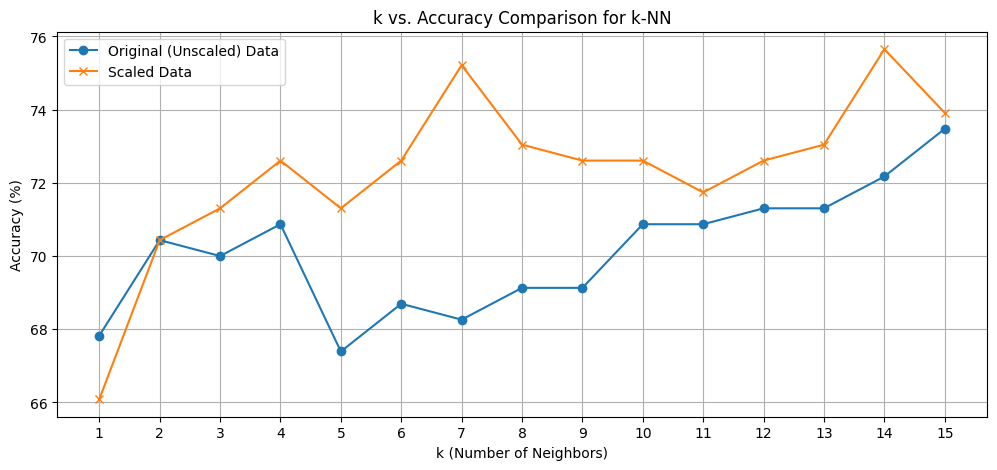

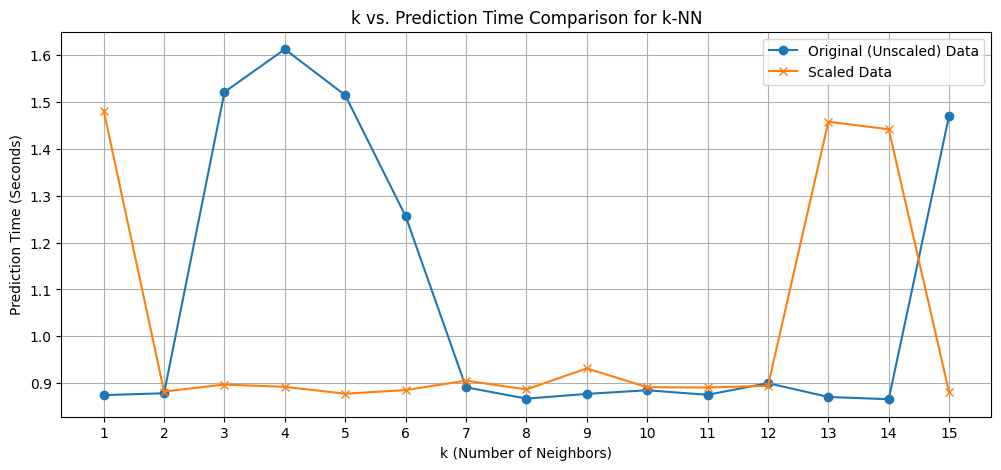

In [17]:
# 2

# i. k vs. Accuracy Plot
plt.figure(figsize=(12, 5))
plt.plot(k_values, list(accuracies_unscaled_k.values()), marker='o', label='Original (Unscaled) Data')
plt.plot(k_values, list(accuracies_scaled_k.values()), marker='x', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy Comparison for k-NN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# ii. k vs. Time Taken Plot
plt.figure(figsize=(12, 5))
plt.plot(k_values, list(times_unscaled_k.values()), marker='o', label='Original (Unscaled) Data')
plt.plot(k_values, list(times_scaled_k.values()), marker='x', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Prediction Time (Seconds)')
plt.title('k vs. Prediction Time Comparison for k-NN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 3

# Identify the optimal k for scaled data (usually gives better performance)
optimal_k_scaled = max(accuracies_scaled_k, key=accuracies_scaled_k.get)
max_acc_scaled = accuracies_scaled_k[optimal_k_scaled]

print("\nIdentifying the optimal k:")
print(f"Based on the scaled data, the highest accuracy is {max_acc_scaled:.2f}% at Optimal k = {optimal_k_scaled}.")
print("The optimal k is chosen at the point where accuracy is maximized on the test set, reflecting the best generalization ability of the model.")


Identifying the optimal k:
Based on the scaled data, the highest accuracy is 75.65% at Optimal k = 14.
The optimal k is chosen at the point where accuracy is maximized on the test set, reflecting the best generalization ability of the model.


## How the choice of k affects the accuracy and computational cost:

### Accuracy vs. k

- Small k (e.g., k=1) leads to a highly complex model with low bias and high variance. The model is susceptible to noise/outliers (overfitting).

- Large k (e.g., k=15) leads to a smoother decision boundary with high bias and low variance (underfitting). The decision boundary is dominated by a larger neighborhood, smoothing out local variations.

- The plots show that accuracy generally peaks at an intermediate value, suggesting a balance between bias and variance.

### Computational cost vs. k

- The k value does not significantly affect the prediction time (computational cost) in this implementation. This is because the dominant step is calculating the distance to all training points, which must happen regardless of k. Sorting the distances and selecting k neighbors is a much faster step.
